# [MultiOT (Optimal Transport in Multilayer Networks)](https://github.com/cdebacco/MultiOT)

[Licensed under the GNU General Public License v3.0](https://github.com/cdebacco/MultiOT/blob/main/LICENSE)

In [1]:
import nbimporter
import utils
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Short experimental setup desription

We test all methods on a small synthetic network with $N = 30$ nodes and $2$ layers. Layer $k=1$ has $20$ nodes and $k=2$ has $10$ nodes. The nodes are distribute uniformly in the unitary square $S = [0,1] \times [0,1]$ for the larger layer ($k=1$), those of the smaller layer share the same coordinates with $10$ nodes drawn randomly from the first $20$. Edges are found by generating a planar graph at each layer using the nodes' Delaunay triangulation. Inter-layer edges join nodes that belong to different layers and have the same coordinates.

We also suppose that:
- It is more convenient to travel on the smaller layer (```-ws "1.0 0.5"```), i.e., edges lengths are halved on $k=2$.
- Traffic congestion on the largest layer is hindered by the multicommodity dynamics (```-betas "0.25 1.0"```) and the fluxes are dispersed over the edges.

**The script can be run with the magic command:**

In [2]:
%run main.py -V 1 -Vtimestep 1 -dynamics_sp_flag 1 -dijkstra_flag 1 -dynamics_flag 1 -Ns "20 10" -ws "1.0 0.5" -betas "0.25 1.0" -epsilonJ 1e-4


** Dyn
IT: 1 delta_mu: 2.584198245793 dJ: 0.003344370355
IT: 2 delta_mu: 2.540820907726 dJ: 0.120003647044
IT: 3 delta_mu: 3.324636189231 dJ: 0.083521557833
** Dyn sp
IT: 1 delta_mu: 1.364359483889 dJ: 5.453441744576
IT: 2 delta_mu: 0.976510407373 dJ: 1.914941158808
IT: 3 delta_mu: 0.759032640235 dJ: 0.668962248764
IT: 4 delta_mu: 0.675906097483 dJ: 0.300746271717
IT: 5 delta_mu: 0.608716061677 dJ: 0.147899005861
IT: 6 delta_mu: 0.518940405141 dJ: 0.083407079981
IT: 7 delta_mu: 0.397045916884 dJ: 0.050022932899
IT: 8 delta_mu: 0.376234222284 dJ: 0.032568558819
IT: 9 delta_mu: 0.254784066455 dJ: 0.02220992916
IT: 10 delta_mu: 0.264132380255 dJ: 0.015916451781
IT: 11 delta_mu: 0.173302218809 dJ: 0.011796786539
IT: 12 delta_mu: 0.181373761644 dJ: 0.009012772671
IT: 13 delta_mu: 0.115151449112 dJ: 0.007055583242
IT: 14 delta_mu: 0.122601228792 dJ: 0.005629961055
IT: 15 delta_mu: 0.075238759087 dJ: 0.004572297108
IT: 16 delta_mu: 0.081957407623 dJ: 0.00375953261
IT: 17 delta_mu: 0.048545724

**Comment:** The cost evolutions in the OT dynamics implementations are smoothly convergent to the problem's optima, namely, the errors above monotonically decrease. This happens because the transportation costs are Lyapunov functionals for their respective OT dynamical systems.

## Results

We can unpack the scripts' results and visualize:
1) The fluxes distributions over the network edges.<br/>
2) The accordance between the shortest path cost extracted with our method and Dijkstra's algorithm.<br/>

In [3]:
OUTPUT_PATH = "./data/output/synthetic/"
data = utils.unpack_results(OUTPUT_PATH)

In [4]:
Ns = data["params"]["Ns"]
number_of_layers = len(Ns)
G = data["network"]["G"]
S = data["params"]["S"]
# w = data["network"]["w"]

edges_layers, edges_layers_index, node_layers, size_node_layers = utils.process_network_for_plots(G, number_of_layers, S)

F_dyn = np.linalg.norm(data["results"]["F_dyn"], ord=1, axis=1)
F_dyn_sp = np.linalg.norm(data["results"]["F_dyn_sp"], ord=1, axis=1)
F_dijkstra = np.linalg.norm(data["results"]["F_dijkstra"], ord=1, axis=1)

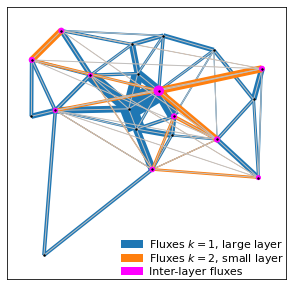

In [5]:
utils.plot_network_F(G, node_layers, size_node_layers, number_of_layers, edges_layers, edges_layers_index, F_dyn)

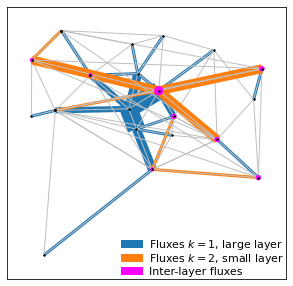

In [6]:
utils.plot_network_F(G, node_layers, size_node_layers, number_of_layers, edges_layers, edges_layers_index, F_dyn_sp)

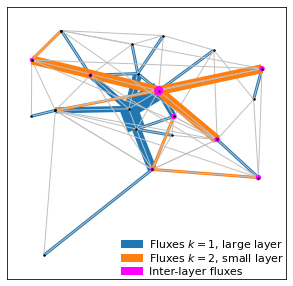

In [7]:
utils.plot_network_F(G, node_layers, size_node_layers, number_of_layers, edges_layers, edges_layers_index, F_dijkstra)

**Comment:** The OT shortest path dynamics converges to a minimizer that is visually identical to that of Dijkstra. In the multicommodity dynamics, the largest layer has more distirbuted fluxes because of the effect of the critical exponent ```beta```.

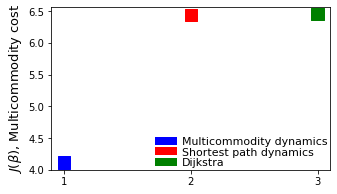

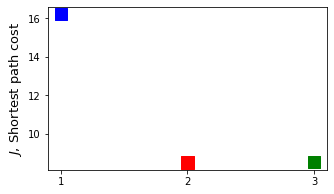

J_dyn: 4.115647973910757
J_dikstra: 6.454547225273956
J_dyn_sp: 6.443273050670727
J_sp_dyn: 16.210749769177536
J_sp_dijkstra: 8.504932966726482
J_sp_dyn_sp: 8.50563887208824


In [8]:
utils.costs(data)